# PARSING_DATES

In [1]:
# LOAD IN THE LIBRARIES
# MODULES WE'LL USE
import pandas as pd 
import numpy as np
import seaborn as sns

# modules for datetime
import datetime

In [2]:
ls = pd.read_csv('ks-projects-201801.csv')
ls

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [4]:
ls.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [7]:
ls = pd.read_csv("2glaxo_df.csv")
ls

,Date,Date.1,Close,gain
0,2010-01-05,2010-01-05,1616.80,-0.005444
1,2010-01-06,2010-01-06,1638.50,0.013422
2,2010-01-07,2010-01-07,1648.70,0.006225
3,2010-01-08,2010-01-08,1639.80,-0.005398
4,2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...,...
1733,2016-12-26,2016-12-26,2723.50,-0.001283
1734,2016-12-27,2016-12-27,2701.75,-0.007986
1735,2016-12-28,2016-12-28,2702.15,0.000148
1736,2016-12-29,2016-12-29,2727.90,0.009529


In [8]:
# set seed for reproducibility
np.random.seed(0)

In [42]:
ls[:5]

,Date,Date.1,Close,gain,date_parsed
0,2010-01-05,2010-01-05,1616.80,-0.005444,2010-01-05
1,2010-01-06,2010-01-06,1638.50,0.013422,2010-01-06
2,2010-01-07,2010-01-07,1648.70,0.006225,2010-01-07
3,2010-01-08,2010-01-08,1639.80,-0.005398,2010-01-08
4,2010-01-11,2010-01-11,1629.45,-0.006312,2010-01-11


In [10]:
ls.head() # showing the first five rows of the dataa

,Date,Date.1,Close,gain
0,2010-01-05,2010-01-05,1616.80,-0.005444
1,2010-01-06,2010-01-06,1638.50,0.013422
2,2010-01-07,2010-01-07,1648.70,0.006225
3,2010-01-08,2010-01-08,1639.80,-0.005398
4,2010-01-11,2010-01-11,1629.45,-0.006312


In [12]:
# print the first few rows of the date column
print(ls['Date'].head())

0    2010-01-05
1    2010-01-06
2    2010-01-07
3    2010-01-08
4    2010-01-11
Name: Date, dtype: object


In [13]:
# check the data type of our date column
ls['Date'].dtype

dtype('O')

In [14]:
# from above two we see that the data type of Date column is "object"

# convert our date columns to datetime

In [ ]:
# format
# 1/17/07 has the format "%m/%d/%y"
# 17-1-2007 has the format "%d-%m-%Y"

In [21]:
# create a new column , date_parsed, with the parsed dates 
ls["date_parsed"] = pd.to_datetime(ls['Date'], format = '%Y-%m-%d')
ls['date_parsed'].head()
# here we get datetime64 as dtype

0   2010-01-05
1   2010-01-06
2   2010-01-07
3   2010-01-08
4   2010-01-11
Name: date_parsed, dtype: datetime64[ns]

In [24]:
ls['date_parsed'].dtype 

dtype('<M8[ns]')

In [25]:
# SELECT THE DAY OF THE MONTH

In [26]:
# get the day of the month from the date_parsed column
day_of_month_ls = ls['date_parsed'].dt.day
day_of_month_ls.head()

0     5
1     6
2     7
3     8
4    11
Name: date_parsed, dtype: int64

In [27]:
# plot the day of the month to check the date parsing

In [28]:
# keep in mind that one of the biggest dangers in parsing dates is mixing up the months and days

In [44]:
date_lengths = ls.Date.str.len()
date_lengths.value_counts() # shows all are in same format

10    1738
Name: Date, dtype: int64

In [45]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
ls.loc[indices]
# no corrupted data

Indices with corrupted data: []


,Date,Date.1,Close,gain,date_parsed


In [29]:
# remove na values
day_of_month_ls = day_of_month_ls.dropna()

In [30]:
day_of_months_ls.sum().isnull()

NameError: name 'day_of_months_ls' is not defined

In [33]:
day_of_month_ls.isnull().sum()

0

In [34]:
# no null values

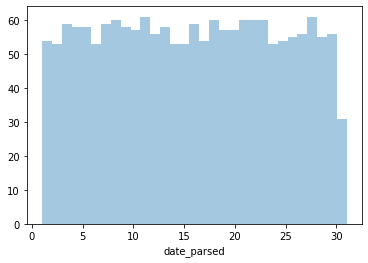

In [37]:
# plot the day of month
sns.distplot(day_of_month_ls, kde=False, bins=31)

In [38]:
'''
We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:'''

"\nWe expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:"

In [39]:
# we parsed the date